# **Hopfield Model** - *Simulation Project*

**Course**: 30561 - *Stochastic Processes and Simulation in Natural Sciences*, **Bocconi University**   
**Authors**: *Russo Katia, 3236213 - Colantoni Matteo, 3276620*

---

## **Index**

1. [Introduction](#1-introduction)
2. [The Hopfield Model](#2-the-hopfield-model)
3. [Simulation of the Hopfield model ($T=0$)](#3-simulation-of-the-hopfield-model-)
4. [Hopfield model at finite temperature ($T\neq0$)](#4-hopfield-model-at-finite-temperature-)
5. [Simulation of the hopfield model at finite temperature](#5-simulation-of-the-hopfield-model-at-finite-temperature)
6. [Conclusion](#6-conclusions)

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

### **1. Introduction**

In this project we study the **Hopfield model** introduced by [Hopfield (1982)](https://www.pnas.org/doi/10.1073/pnas.79.8.2554).

We consider a network of $N$ binary units with *symmetric connections* learned from a set of random patterns using a **Hebbian rule**. 

Our main goal is to investigate how the **probability of successful retrieval of a stored pattern** depends on the **number of stored patterns** and on the **temperature**. More precisely:
- at **zero temperature** we use deterministic asynchronous dynamics and show that the system retrieves memories from noisy initial conditions, and we estimate the storage capacity by measuring retrieval probability versus the load $\alpha = P/N$;
- at **finite temperature** we interpret the Hopfield model as an Ising-like system with Boltzmann distribution, simulate it using the Metropolis algorithm, and study how thermal noise modifies the retrieval probability as a function of $\alpha$ and $\beta = 1/T$.

### **2. The Hopfield model**

#### **2.1. Network and stored patterns**

We consider a fully connected network of $N$ binary neurons (or spins)
$$
S_i \in \ \{-1,1\}, \qquad i = 1,\dots,N.
$$

The network is required to store $p$ binary patterns
$$
\xi^\mu = (\xi_1^\mu,\dots,\xi_N^\mu), 
\qquad \xi_i^\mu \in \{-1,1\}, 
\qquad \mu = 1,\dots,p,
$$
which we assume to be random and independent (each $\xi_i^\mu$ is $+1$ or $-1$ with probability $\frac{1}{2}$).

In Hopfield’s original paper the neuron states are written as $x_i \in \{0,1\}$ with a synaptic matrix $T_{ij}$. For convenience, we work with states $\{-1,1\}$ and couplings $J_{ij}$, related by the change of variables
$$
S_i = 2 x_i - 1 .
$$



#### **2.2. Synaptic coupling (Hebbian learning)**

The synaptic couplings between neurons $i$ and $j$ are set by the Hebbian learning rule
$$
J_{ij} = \frac{1}{N} \sum_{\mu=1}^p \xi_i^\mu \xi_j^\mu , \qquad i \neq j,
$$
and $J_{ii} = 0$.  

The matrix $J = (J_{ij})_{i,j \in \{1, \dots, N\}}$ is **symmetric**, $J_{ij} = J_{ji}$. This symmetry is crucial: it guarantees the existence of an energy (Lyapunov) function that decreases along the dynamics.

Intuitively, the Hebbian rule “connects together” neurons that are co-active in the same stored patterns. If two neurons take the same value in many patterns, their coupling $J_{ij}$ is positive, making it energetically favourable for them to align. If they often take opposite values, $J_{ij}$ tends to be negative, making it favourable for them to anti-align.

#### **2.3. Energy function**
Given a configuration $\mathbf{S} = (S_1, \dots, S_N)$, the Hopfield energy is defined as
$$
E(\mathbf{S}) = -\frac{1}{2} \sum_{i \neq j} J_{ij} S_i S_j.
$$

The factor $1/2$ avoids double-counting pairs $i,j$. This energy plays the role of a Lyapunov function: for the deterministic dynamics defined below, $E(\mathbf{S}(t))$ never increases with time. Local minima of $E$ are attractors of the dynamics. For small enough number of patterns $p$, the stored patterns $\xi^\mu$ are (approximate) local minima of $E$.



#### **2.4. Local field**
The effective input that neuron $i$ receives from the rest of the network is the **local field**
$$
h_i(\mathbf{S}) = \sum_{j=1}^N J_{ij} S_j.
$$

If $h_i > U_i$, it is energetically favourable for neuron $i$ to take the value $+1$; if $h_i < U_i$, it is favourable to take $-1$. $U_i$ is a fixed threshold, which unless otherwise stated, we set $U_i=0$. Therefore, the sign of $h_i$ tells us which state of neuron $i$ is more consistent with the current state of the rest of the network.

#### **2.5. Deterministic asynchronous update rule ($T = 0$)**

At zero temperature $(T = 0)$ the Hopfield dynamics is deterministic. We update one neuron at a time (asynchronous dynamics). At each update step:

1. Choose an index $i \in \{1, \dots, N\}$ (typically at random).
2. Compute its local field $h_i(\mathbf{S})$.
3. Update neuron $i$ by aligning it with its local field:
   $$
   S_i \leftarrow \operatorname{sign}\big(h_i(\mathbf{S})\big) ,
   $$
   with the convention that if $h_i(\mathbf{S}) = 0$ we may leave $S_i$ unchanged.

All other neurons $S_j$, $j \neq i$, remain fixed during this update. One **sweep** of the dynamics corresponds to updating all neurons once (for example in a random order).


#### **2.6. Overlap and Hamming distance**

To quantify how close the current state $\mathbf{S} = (S_1, \dots, S_N)$ is to a stored pattern $\xi^\mu = (\xi_1^\mu, \dots, \xi_N^\mu)$, we use the **overlap**
$$
m^\mu(\mathbf{S}) = \frac{1}{N} \sum_{i=1}^N \xi_i^\mu S_i.
$$

Both $\xi_i^\mu$ and $S_i$ take values in $\{-1, +1\}$, so:
- if $S_i = \xi_i^\mu$, the contribution to the sum is $+1$;
- if $S_i \neq \xi_i^\mu$, the contribution is $-1$.

If $\mathbf{S}$ coincides exactly with pattern $\xi^\mu$, then $m^\mu = 1$.  
If $\mathbf{S}$ is exactly the opposite pattern $-\xi^\mu$, then $m^\mu = -1$.  
If $\mathbf{S}$ is uncorrelated with $\xi^\mu$, then $m^\mu \approx 0$.

Another way to measure similarity is the **Hamming distance** between $\mathbf{S}$ and $\xi^\mu$, defined as the number of neurons where they differ:
$$
d^\mu(\mathbf{S}) = \#\{ i : S_i \neq \xi_i^\mu \}.
$$
In the Hopfield paper this is often described as the “number of errors” in the state relative to the stored pattern.

For spins in $\{-1,+1\}$, overlap and Hamming distance are directly related. Let $d^\mu(\mathbf{S})$ be the number of sites where $S_i \neq \xi_i^\mu$. Then the number of matching sites is $N - d^\mu$. In the overlap,
$$
m^\mu = \frac{1}{N} \big[(\text{matches}) - (\text{mismatches})\big] 
      = \frac{1}{N} \big[(N - d^\mu) - d^\mu\big] 
      = 1 - 2\frac{d^\mu}{N}.
$$
Equivalently,
$$
d^\mu = \frac{N}{2}(1 - m^\mu).
$$

This means that using the overlap $m^\mu$ or the Hamming distance $d^\mu$ is essentially equivalent: they contain the same information. In this notebook I will mainly use the overlap $m^\mu$ as the order parameter.

### **3. Simulation of the Hopfield model ($T=0$)**

#### **3.1. Helper functions**

In [2]:
# For reproducibility
rng = np.random.default_rng(seed=123)

def generate_patterns(N, P, rng):
    """
    Generate P random binary patterns of length N, with entries in {-1, +1}.
    """
    # Random values 0 or 1, then map to -1/+1
    patterns = rng.integers(low=0, high=2, size=(P, N))
    patterns = 2 * patterns - 1
    return patterns


def hebbian_weights(patterns):
    """
    Construct the Hebbian coupling matrix J_ij = (1/N) * sum_mu xi_i^mu * xi_j^mu,
    with J_ii = 0.
    """
    P, N = patterns.shape
    Xi = patterns                      # shape (P, N)
    J = Xi.T @ Xi / N                  # Hebbian rule J = (1/N) Xi^T Xi
    np.fill_diagonal(J, 0.0)           # remove self-couplings
    return J

In [3]:
def energy(S, J):
    """
    Compute the Hopfield energy using matrix form.
    """
    return -0.5 * S @ (J @ S)


def local_fields(S, J):
    """
    Compute the local field h_i(S) = sum_j J_ij S_j for all i at once.
    """
    return J @ S

In [4]:
def overlap(S, pattern):
    """
    Compute overlap m = (1/N) * sum_i xi_i * S_i between current state S
    and a stored pattern xi.
    """
    N = S.size
    return np.dot(S, pattern) / N


def hamming_distance(S, pattern):
    """
    Compute the Hamming distance d(S, pattern) = number of sites where S_i != xi_i.
    """
    return np.sum(S != pattern)

In [5]:
def show_pattern_as_image(pattern, title="", cmap="gray"):
    """
    Visualise a 1D pattern of length N as a sqrt(N) x sqrt(N) image.
    We map spins {-1, +1} to {0, 1} for display.
    """
    N = pattern.size
    side = int(np.sqrt(N))
    if side * side != N:
        raise ValueError("N is not a perfect square; cannot reshape into a square image.")
    
    # Map -1 -> 0, +1 -> 1
    img = (pattern + 1) / 2.0
    img = img.reshape(side, side)
    
    plt.imshow(img, cmap=cmap, interpolation="nearest")
    plt.title(title)
    plt.axis("off")

To probe the associative memory property of the Hopfield network, we will not start the dynamics exactly from a stored pattern, but from a **noisy version** of it. The following helper function constructs an initial configuration by taking a stored pattern and flipping each spin independently with a given probability `noise_level`. This mimics presenting the network with a corrupted cue and testing whether the dynamics can clean up the noise and recover the original pattern.

In [6]:
def noisy_initial_state(pattern, noise_level, rng):
    """
    Create a noisy initial state starting from `pattern` by flipping each spin
    independently with probability noise_level.
    """
    N = pattern.size
    S = pattern.copy()
    flip_mask = rng.random(N) < noise_level
    S[flip_mask] *= -1
    return S

#### **3.2. Deterministic Hopfield dynamics**

##### 3.2.1. Single asynchronous sweep

In [7]:
def hopfield_async_sweep(S, J, rng):
    """
    Perform one asynchronous sweep of deterministic T=0 Hopfield updates.
    Each neuron is updated once, in a random order.
    """
    N = S.size
    S_new = S.copy()
    
    # Random permutation of neuron indices
    indices = rng.permutation(N)
    
    for i in indices:
        # Local field at neuron i in the current state
        h_i = np.dot(J[i, :], S_new)
        
        if h_i > 0:
            S_new[i] = 1
        elif h_i < 0:
            S_new[i] = -1
        else:
            # If h_i == 0, we leave S_new[i] unchanged
            pass
    
    return S_new

##### 3.2.2. Run dynamics

In [8]:
def run_deterministic_hopfield_with_hamming(
    S0, J, target_pattern, rng, max_sweeps=50, tol_stable=0
):
    """
    Run deterministic T=0 Hopfield dynamics starting from S0.
    Track energy, overlap, and Hamming distance at each sweep.
    """
    S = S0.copy()
    states = [S.copy()]
    energies = [energy(S, J)]
    overlaps = [overlap(S, target_pattern)]
    hammings = [hamming_distance(S, target_pattern)]
    
    stable_counter = 0
    
    for sweep in range(1, max_sweeps + 1):
        S_new = hopfield_async_sweep(S, J, rng)
        
        states.append(S_new.copy())
        energies.append(energy(S_new, J))
        overlaps.append(overlap(S_new, target_pattern))
        hammings.append(hamming_distance(S_new, target_pattern))
        
        if np.array_equal(S_new, S):
            stable_counter += 1
        else:
            stable_counter = 0
        
        S = S_new
        
        if tol_stable > 0 and stable_counter >= tol_stable:
            break
    
    return states, energies, overlaps, hammings

In [9]:
def summarize_run(energies, overlaps, hammings):
    """
    Print a short textual summary of the dynamics.
    """
    n_sweeps = len(energies) - 1  # sweep 0 is initial state
    print(f"Number of sweeps performed: {n_sweeps}")
    
    print("\nInitial state:")
    print(f"  Energy H0       = {energies[0]:.3f}")
    print(f"  Overlap m0      = {overlaps[0]:.3f}")
    print(f"  Hamming d0      = {hammings[0]} errors")
    
    print("\nFinal state:")
    print(f"  Energy H_final  = {energies[-1]:.3f}")
    print(f"  Overlap m_final = {overlaps[-1]:.3f}")
    print(f"  Hamming d_final = {hammings[-1]} errors")
    
    if hammings[-1] == 0:
        print("\nResult: exact retrieval of the pattern.")
    else:
        print("\nResult: retrieval not perfect (spurious or partially correct attractor).")

##### 3.2.3. Simulation

In this example we illustrate a single retrieval process at zero temperature. We fix $N = 100$ neurons and store $P = 3$ random patterns using the Hebbian rule. Starting from a noisy version of one stored pattern (with 20% of spins flipped), we run asynchronous Hopfield dynamics for a fixed number of sweeps and track the energy, the Hamming distance and the overlap with the target pattern.

Number of sweeps performed: 3

Initial state:
  Energy H0       = -18.220
  Overlap m0      = 0.620
  Hamming d0      = 19 errors

Final state:
  Energy H_final  = -48.520
  Overlap m_final = 1.000
  Hamming d_final = 0 errors

Result: exact retrieval of the pattern.


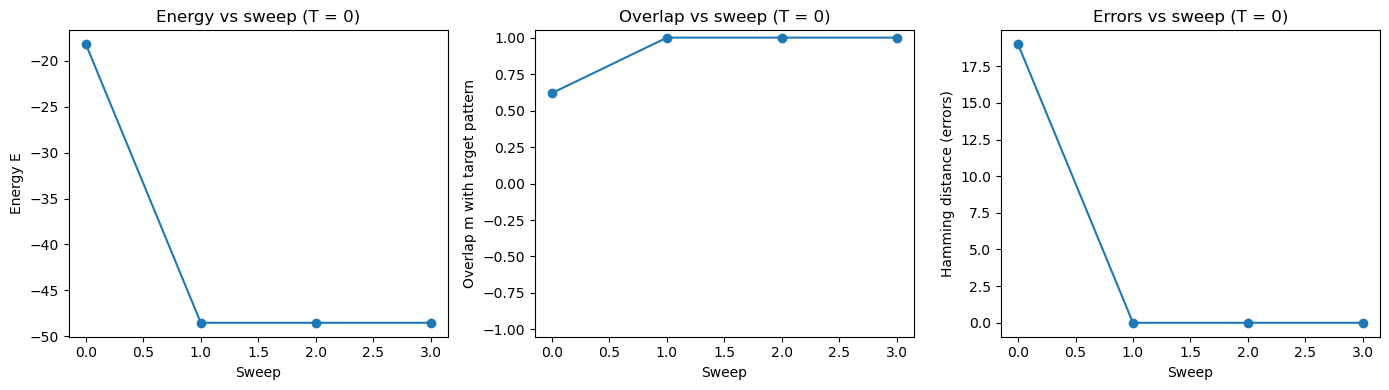

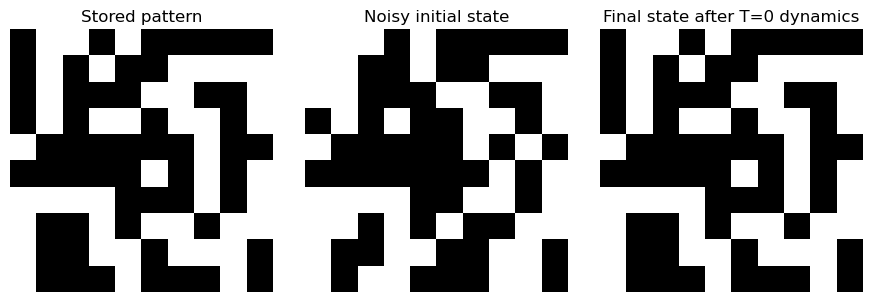

In [10]:
N = 100        # number of neurons (10 x 10 for image visualisation)
P = 3          # number of stored patterns
noise_level = 0.2   # fraction of spins flipped in initial state
max_sweeps = 30

# 1. Generate patterns and weights
patterns = generate_patterns(N, P, rng)
J = hebbian_weights(patterns)

# Choose one pattern as the target memory
mu_star = 0
xi_star = patterns[mu_star]

# 2. Build a noisy initial state
S0 = noisy_initial_state(xi_star, noise_level, rng)

# 3. Run deterministic Hopfield dynamics (with Hamming distance)
states, energies, overlaps, hammings = run_deterministic_hopfield_with_hamming(
    S0, J, xi_star, rng, max_sweeps=max_sweeps, tol_stable=2
)

# 4. Print a textual summary
summarize_run(energies, overlaps, hammings)

# 5. Plot energy, overlap, and Hamming distance vs sweep
sweep_indices = np.arange(len(energies))

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

# Energy plot
ax[0].plot(sweep_indices, energies, marker='o')
ax[0].set_xlabel('Sweep')
ax[0].set_ylabel('Energy E')
ax[0].set_title('Energy vs sweep (T = 0)')

# Overlap plot
ax[1].plot(sweep_indices, overlaps, marker='o')
ax[1].set_xlabel('Sweep')
ax[1].set_ylabel('Overlap m with target pattern')
ax[1].set_title('Overlap vs sweep (T = 0)')
ax[1].set_ylim(-1.05, 1.05)

# Hamming distance plot
ax[2].plot(sweep_indices, hammings, marker='o')
ax[2].set_xlabel('Sweep')
ax[2].set_ylabel('Hamming distance (errors)')
ax[2].set_title('Errors vs sweep (T = 0)')

plt.tight_layout()
plt.savefig("../figures/hopfield_dynamics_convergence_T0.png",
            dpi=300, bbox_inches="tight")
plt.show()

# 6. Visualise target pattern, initial state, and final state as images
final_state = states[-1]

plt.figure(figsize=(9, 3))

plt.subplot(1, 3, 1)
show_pattern_as_image(xi_star, title="Stored pattern")

plt.subplot(1, 3, 2)
show_pattern_as_image(S0, title="Noisy initial state")

plt.subplot(1, 3, 3)
show_pattern_as_image(final_state, title="Final state after T=0 dynamics")

plt.tight_layout()
plt.savefig("../figures/hopfield_pattern_retrieval_T0.png",
            dpi=300, bbox_inches="tight")
plt.show()

The plot confirms the theoretical property of the Hopfield dynamics at $T=0$: the energy is non-increasing along the trajectory and quickly stabilises to a plateau, corresponding to a local minimum of $E(\mathbf{s})$. When the initial condition is a noisy version of a stored pattern, this minimum typically coincides with that pattern, demonstrating how the dynamics “denoises” the cue.

#### **3.3. Capacity - Retrieval probability**

We now move from single examples to a **systematic capacity experiment at $T=0$**. Here we fix the system size $N$ and vary the number of stored patterns $P$, or equivalently the load $\alpha = P/N$. For each value of $P$:

1. We generate a new set of random patterns and the corresponding Hebbian coupling matrix \(J\).
2. We select one pattern to retrieve, create a noisy initial state, and run the deterministic Hopfield dynamics until it converges.
3. We declare the retrieval **successful** if the final overlap with the cued pattern exceeds a chosen threshold (e.g. $m \ge 0.9$).

By repeating this procedure for many independent trials, we obtain an empirical estimate of the retrieval probability as a function of $\alpha$, which can be compared to the theoretical storage capacity of the Hopfield model.

In [11]:
def deterministic_retrieval_trial(J, patterns, mu, noise_level, rng,
                                  max_sweeps=30, tol_stable=2,
                                  overlap_threshold=0.9):
    """
    Perform a single retrieval trial at T=0 for a fixed J and patterns.
  
    Steps:
    - start from a noisy version of pattern xi^mu,
    - run deterministic Hopfield dynamics,
    - check if final overlap >= overlap_threshold.
    """
    xi_star = patterns[mu]
    S0 = noisy_initial_state(xi_star, noise_level, rng)
    
    states, energies, overlaps, hammings = run_deterministic_hopfield_with_hamming(
        S0, J, xi_star, rng, max_sweeps=max_sweeps, tol_stable=tol_stable
    )
    
    m_final = overlaps[-1]
    d_final = hammings[-1]
    
    success = m_final >= overlap_threshold
    
    return success, m_final, d_final

In [12]:
def estimate_retrieval_probability_deterministic(
    N, P, noise_level, n_trials, rng,
    max_sweeps=30, tol_stable=2, overlap_threshold=0.9
):
    """
    Estimate retrieval probability for T=0 Hopfield with given N, P.
    
    Procedure:
    - Generate P random patterns and Hebbian J.
    - For n_trials:
        - pick a random pattern index mu
        - run one retrieval trial
        - record success (True/False)
    
    """
    # Generate patterns and weights once for this (N, P)
    patterns = generate_patterns(N, P, rng)
    J = hebbian_weights(patterns)
    
    successes = []
    m_finals = []
    d_finals = []
    
    for _ in range(n_trials):
        mu = rng.integers(0, P)  # random stored pattern
        success, m_final, d_final = deterministic_retrieval_trial(
            J, patterns, mu, noise_level, rng,
            max_sweeps=max_sweeps, tol_stable=tol_stable,
            overlap_threshold=overlap_threshold
        )
        successes.append(success)
        m_finals.append(m_final)
        d_finals.append(d_final)
    
    prob_success = np.mean(successes)
    return prob_success, m_finals, d_finals


##### 3.3.1. Retrieval probability vs $\alpha$ for fixed $N$

Estimating retrieval probability for N=200, P=1 (alpha=0.005)...
Estimating retrieval probability for N=200, P=6 (alpha=0.030)...
Estimating retrieval probability for N=200, P=11 (alpha=0.055)...
Estimating retrieval probability for N=200, P=16 (alpha=0.080)...
Estimating retrieval probability for N=200, P=21 (alpha=0.105)...
Estimating retrieval probability for N=200, P=26 (alpha=0.130)...
Estimating retrieval probability for N=200, P=31 (alpha=0.155)...
Estimating retrieval probability for N=200, P=36 (alpha=0.180)...
Estimating retrieval probability for N=200, P=41 (alpha=0.205)...
Estimating retrieval probability for N=200, P=46 (alpha=0.230)...
Estimating retrieval probability for N=200, P=51 (alpha=0.255)...
Estimating retrieval probability for N=200, P=56 (alpha=0.280)...
Estimating retrieval probability for N=200, P=61 (alpha=0.305)...
Estimating retrieval probability for N=200, P=66 (alpha=0.330)...
Estimating retrieval probability for N=200, P=71 (alpha=0.355)...
Estimating r

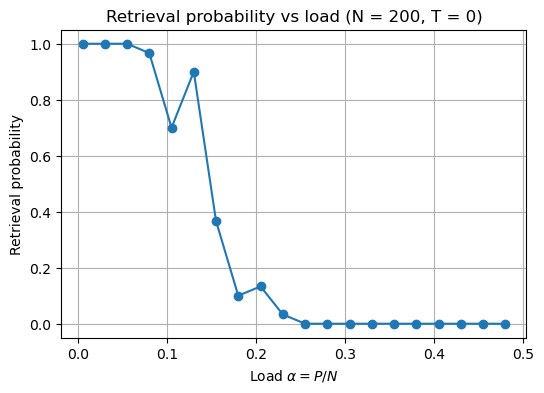

In [13]:
N = 200
noise_level = 0.2          # 20% corrupted initial states
n_trials = 30              # retrieval attempts per P
max_sweeps = 40
overlap_threshold = 0.9

P_values = np.arange(1, int(0.5 * N) + 1, 5)  # e.g. 1, 6, 11, ...
alpha_values = P_values / N
probabilities = []

for P in P_values:
    print(f"Estimating retrieval probability for N={N}, P={P} (alpha={P/N:.3f})...")
    prob_success, _, _ = estimate_retrieval_probability_deterministic(
        N, P, noise_level, n_trials, rng,
        max_sweeps=max_sweeps, tol_stable=2, overlap_threshold=overlap_threshold
    )
    probabilities.append(prob_success)

probabilities = np.array(probabilities)

plt.figure(figsize=(6,4))
plt.plot(alpha_values, probabilities, marker='o')
plt.xlabel(r'Load $\alpha = P/N$')
plt.ylabel('Retrieval probability')
plt.title(f'Retrieval probability vs load (N = {N}, T = 0)')
plt.ylim(-0.05, 1.05)
plt.grid(True)
plt.savefig("../figures/hopfield_retrieval_probability_vs_load_N200_T0.png",
            dpi=300, bbox_inches="tight")
plt.show()

The resulting curve shows the estimated **probability of successful retrieval** as a function of the load
$$
\alpha = \frac{P}{N}.
$$
For small $\alpha$, the probability is close to 1: the network reliably retrieves the correct pattern. As $\alpha$ increases, the probability rapidly drops towards 0, indicating that the network is no longer able to clean up the noise and often falls into spurious attractors.

##### 3.3.2. Retrieval probability vs $\alpha$ for different $N$

To study finite-size effects, we now repeat the retrieval probability experiment for several system sizes $N$ and compare the resulting curves as a function of the load $\alpha = P/N$.

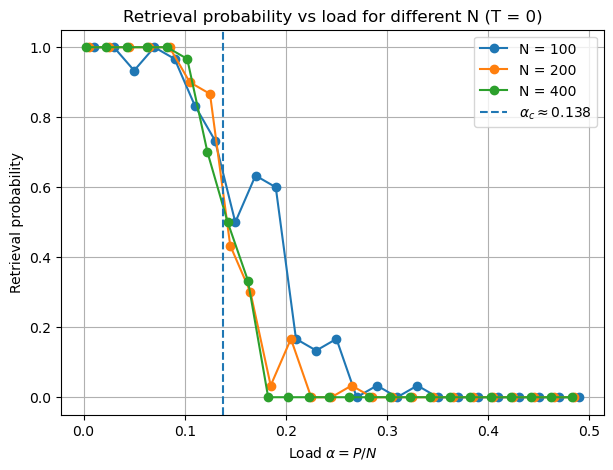

In [14]:
N_list = [100, 200, 400]
noise_level = 0.2
n_trials = 30
max_sweeps = 40
overlap_threshold = 0.9

plt.figure(figsize=(7,5))

for N in N_list:
    # ~50 P values per N
    P_values = np.arange(1, int(0.5 * N) + 1, max(1, N // 50))
    alpha_values = P_values / N
    probabilities = []
    
    for P in P_values:
        prob_success, _, _ = estimate_retrieval_probability_deterministic(
            N, P, noise_level, n_trials, rng,
            max_sweeps=max_sweeps, tol_stable=2, overlap_threshold=overlap_threshold
        )
        probabilities.append(prob_success)
    
    probabilities = np.array(probabilities)
    plt.plot(alpha_values, probabilities, marker='o', label=f'N = {N}')

# Theoretical capacity (vertical guide line)
alpha_c = 0.138
plt.axvline(alpha_c, linestyle='--', label=r'$\alpha_c \approx 0.138$')

plt.xlabel(r'Load $\alpha = P/N$')
plt.ylabel('Retrieval probability')
plt.title('Retrieval probability vs load for different N (T = 0)')
plt.ylim(-0.05, 1.05)
plt.grid(True)
plt.legend()
plt.savefig("../figures/hopfield_capacity_scaling_multiple_N_T0.png",
            dpi=300, bbox_inches="tight")
plt.show()

The curves for different $N$ approximately collapse when expressed in terms of $\alpha$, and the drop in retrieval performance systematically occurs around $\alpha \sim 0.1\text{–}0.2$. As $N$ increases, the transition becomes sharper and the location of the steepest descent moves closer to a common value.

This is in qualitative agreement with the theoretical storage capacity of the Hopfield model,
$$
\alpha_c \approx 0.138,
$$
obtained in the thermodynamic limit $N \to \infty$. Because the simulations are done for finite $N$ and a finite number of trials, the empirical curves do not show a perfectly sharp phase transition, but they clearly display the characteristic behaviour predicted by the theory: reliable retrieval below a critical load and failure above it.

### **4. Hopfield Model at finite temperature ($T\neq0$)**

#### **4.1. Boltzmann distribution**
So far we have considered the Hopfield model at zero temperature, with deterministic asynchronous updates that always move downhill in the energy landscape. In that setting, the dynamics converges to local minima of the energy function, and stored patterns act as attractors of the dynamics.

In thermal equilibrium, the probability of observing a configuration $\mathbf{S} = (S_1,\dots,S_N)$ is given by the **Boltzmann distribution**
$$
P(\mathbf{S}) = \frac{1}{Z(\beta)} \exp\big(-\beta E(\mathbf{S})\big), \qquad \beta = \frac{1}{T},
$$
where
$$
Z(\beta) = \sum_{\mathbf{S}} \exp\big(-\beta E(\mathbf{S})\big)
$$
is the **partition function** and the sum runs over all $2^N$ spin configurations $\mathbf{S} \in \{-1,+1\}^N$.

The parameter $\beta = \frac{1}{T}$ controls how strongly the system prefers low-energy states:

- For **low temperature** ($T \to 0$, $\beta \to \infty$), the distribution concentrates on configurations that minimise $E(\mathbf{S})$ (ground states and deep minima).
- For **high temperature** ($T \to \infty$, $\beta \to 0$), all configurations become almost equally likely and the system behaves like random noise.

In the context of the Hopfield model, studying the system at finite temperature means analysing the behaviour of the network when its dynamics is influenced by thermal noise. Instead of always moving downhill in energy, the system is allowed to make occasional “uphill” moves, exploring a neighbourhood of the attractors. The configurations visited in the long run should sample from the Boltzmann distribution associated with the Hopfield Hamiltonian.



#### **4.2. Limitations**

At finite temperature, the **equilibrium object of interest** is the Boltzmann distribution
$$
P(\mathbf{S}) \propto \exp\big(-\beta E(\mathbf{S})\big),
$$
and many quantities we care about (for example, the average overlap with a stored pattern at temperature $T$) are expectations with respect to this distribution. In principle, one could attempt to compute such expectations by summing over all configurations:
$$
\langle f(\mathbf{S}) \rangle_\beta = \sum_{\mathbf{S}} f(\mathbf{S}) \, P(\mathbf{S}) 
= \frac{1}{Z(\beta)} \sum_{\mathbf{S}} f(\mathbf{S}) \, e^{-\beta E(\mathbf{S})}.
$$

However, this is completely infeasible in practice: the state space has size $2^N$, which becomes astronomically large even for moderate $N$ (for instance $N=100$ already gives $2^{100} \approx 10^{30}$ configurations). We cannot enumerate all states and compute the partition function $Z(\beta)$ explicitly.

Therefore:

- we **cannot** directly sample from $P(\mathbf{S})$ by writing down its normalised formula (because we do not know $Z(\beta)$), and
- we **cannot** compute exact expectations by summing over all $\mathbf{S}$.

Instead, we need a way to **simulate a stochastic dynamics** that explores the state space using only *local* information (such as energy differences) and that has the desired Boltzmann distribution as its stationary distribution. This is exactly the purpose of **Markov chain Monte Carlo (MCMC)** methods.

#### **4.3. Markov Chain Monte Carlo (MCMC) and Metropolis algorithm**
The general MCMC idea is to construct a Markov chain
$$
\mathbf{S}^{(0)}, \mathbf{S}^{(1)}, \mathbf{S}^{(2)}, \dots
$$
on the space of configurations such that the desired Boltzmann distribution $P(\mathbf{S}) \propto e^{-\beta E(\mathbf{S})}$ is the **stationary distribution** of the chain.

If this hold, then for large times $t$, the distribution of $\mathbf{S}^{(t)}$ is approximately $P(\mathbf{S})$, and time averages along the trajectory can be used to estimate ensemble averages under $P$.

One of the simplest and most widely used MCMC schemes is the **Metropolis algorithm**.

Consider flipping a single spin $S_i$ to $-S_i$, obtaining a new configuration $\mathbf{S}'$ that differs from $\mathbf{S}$ only at site $i$. A straightforward calculation shows that the corresponding energy change is
$$
\Delta E_i = E(\mathbf{S}') - E(\mathbf{S}) = 2\, S_i\, h_i(\mathbf{S}).
$$

The **single-spin Metropolis update** for the Hopfield model at inverse temperature $\beta$ is:

1. **Choose a neuron** $i \in \{1,\dots,N\}$ uniformly at random.
2. **Compute the local field** at $i$:
   $$
   h_i(\mathbf{S}) = \sum_j J_{ij} S_j.
   $$
3. **Compute the energy change** if we flip $S_i$:
   $$
   \Delta E_i = 2\, S_i\, h_i(\mathbf{S}).
   $$
4. **Decide whether to flip**:
   - If $\Delta E_i \le 0$ (the flip lowers or leaves unchanged the energy), **accept** the flip with probability 1.
   - If $\Delta E_i > 0$ (the flip increases the energy), accept the flip with probability
     $$
     A_i = \exp(-\beta \Delta E_i) \in (0,1).
     $$
   - If the flip is accepted, set $S_i \leftarrow -S_i$; if it is rejected, keep $S_i$ unchanged.

One **Metropolis sweep** consists of $N$ such single-spin updates, so that on average each neuron has had one chance to flip.

This update rule satisfies **detailed balance** with respect to the Boltzmann distribution
$$
P(\mathbf{S}) \propto \exp\big(-\beta E(\mathbf{S})\big),
$$
so that $P$ is stationary for the Markov chain defined by the Metropolis dynamics. Intuitively:

- Moves that decrease the energy are always accepted.
- Moves that increase the energy are sometimes accepted, but with a probability that decreases as the energy penalty $\Delta E_i$ or the inverse temperature $\beta$ increases.

In the **limit $T \to 0$** ($\beta \to \infty$), the acceptance probability for energy-increasing moves goes to zero. In this limit, the Metropolis dynamics reduces to the deterministic Hopfield update.

### **5. Simulation of the Hopfield model at finite temperature**

#### **5.1. Helper functions**

In [15]:
def delta_energy_flip(i, S, J):
    """
    Compute the energy change ΔH if we flip spin S[i] -> -S[i].
    
    For Hopfield E(S) = -1/2 * sum_{i!=j} J_ij S_i S_j, one can show:
        ΔE_i = EH(S') - E(S) = 2 * S_i * h_i(S)
    where h_i(S) = sum_j J_ij S_j is the local field at i.
    """
    h_i = np.dot(J[i, :], S)
    return 2.0 * S[i] * h_i


def metropolis_step(S, J, beta, rng):
    """
    Perform one single-spin Metropolis update for the Hopfield model.
    
    """
    N = S.size
    
    # 1. Choose a neuron at random
    i = rng.integers(0, N)
    
    # 2. Compute energy change if we flip S[i]
    dE = delta_energy_flip(i, S, J)
    
    # 3. Metropolis acceptance rule
    if dE <= 0:
        # Always accept energy-decreasing moves
        S[i] *= -1
    else:
        # Accept energy-increasing moves with probability exp(-beta * dE)
        if rng.random() < np.exp(-beta * dE):
            S[i] *= -1
    
    return S


def metropolis_sweep(S, J, beta, rng):
    """
    Perform one Metropolis sweep: N single-spin updates.
    """
    N = S.size
    for _ in range(N):
        S = metropolis_step(S, J, beta, rng)
    return S


In [16]:
def run_metropolis_hopfield(
    S0, J, beta, target_pattern, rng,
    n_sweeps=200
):
    """
    Run Metropolis dynamics for the Hopfield model at finite temperature.

    """
    S = S0.copy()
    N = S.size
    
    states   = [S.copy()]
    energies = [energy(S, J)]
    overlaps = [overlap(S, target_pattern)]
    hammings = [hamming_distance(S, target_pattern)]
    
    for sweep in range(1, n_sweeps + 1):
        S = metropolis_sweep(S, J, beta, rng)
        states.append(S.copy())
        energies.append(energy(S, J))
        overlaps.append(overlap(S, target_pattern))
        hammings.append(hamming_distance(S, target_pattern))
    
    return states, energies, overlaps, hammings


def summarize_metropolis_run(energies, overlaps, hammings, burn_in_sweeps=50):
    """
    Print a summary of a Metropolis run at finite temperature.
    We report initial values and approximate equilibrium averages (after burn-in).
    """
    n_sweeps = len(energies) - 1
    N = None  # energy is total; energy per spin will be computed outside if needed
    
    print(f"Total sweeps performed: {n_sweeps}")
    print(f"Burn-in sweeps (for averages): {burn_in_sweeps}")
    
    print("\nInitial state (sweep 0):")
    print(f"  Energy H0       = {energies[0]:.3f}")
    print(f"  Overlap m0      = {overlaps[0]:.3f}")
    print(f"  Hamming d0      = {hammings[0]} errors")
    
    # Averages after burn-in
    start = burn_in_sweeps
    E_eq = np.mean(energies[start:])
    m_eq = np.mean(overlaps[start:])
    d_eq = np.mean(hammings[start:])
    
    print("\nApproximate equilibrium averages (after burn-in):")
    print(f"  <E>_eq          = {E_eq:.3f}")
    print(f"  <m>_eq          = {m_eq:.3f}")
    print(f"  <d>_eq          = {d_eq:.2f} errors")


#### **5.2. Simulation**

Total sweeps performed: 200
Burn-in sweeps (for averages): 50

Initial state (sweep 0):
  Energy H0       = -18.920
  Overlap m0      = 0.580
  Hamming d0      = 21 errors

Approximate equilibrium averages (after burn-in):
  <E>_eq          = -34.339
  <m>_eq          = 0.719
  <d>_eq          = 14.07 errors


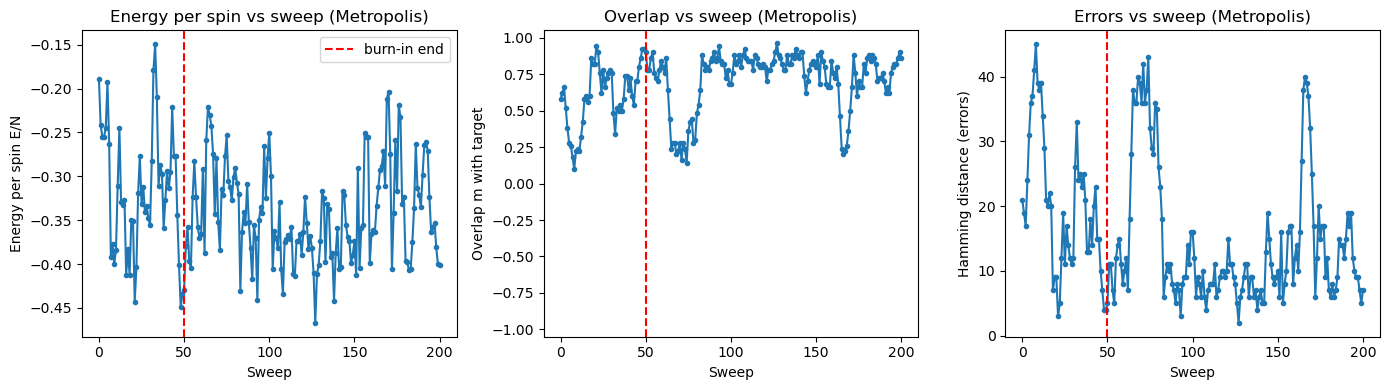

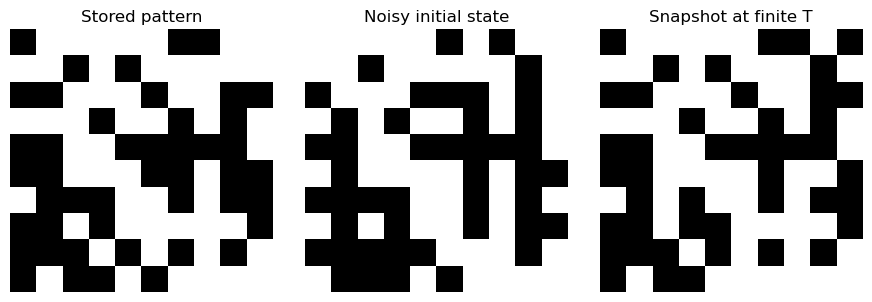

In [17]:
N = 100
P = 3
noise_level = 0.2
beta = 1.5          # inverse temperature
n_sweeps = 200
burn_in_sweeps = 50

# 1. Generate patterns and weights
patterns = generate_patterns(N, P, rng)
J = hebbian_weights(patterns)

# Choose target pattern
mu_star = 0
xi_star = patterns[mu_star]

# 2. Noisy initial state
S0 = noisy_initial_state(xi_star, noise_level, rng)

# 3. Run Metropolis dynamics
states, energies, overlaps, hammings = run_metropolis_hopfield(
    S0, J, beta, xi_star, rng,
    n_sweeps=n_sweeps
)

# 4. Summary (equilibrium averages) in terms of total E and m
summarize_metropolis_run(energies, overlaps, hammings, burn_in_sweeps=burn_in_sweeps)

# 5. Plots: energy per spin, overlap, and Hamming vs sweep
sweep_indices = np.arange(len(energies))
energies_per_spin = np.array(energies) / N

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

# Energy per spin
ax[0].plot(sweep_indices, energies_per_spin, marker='.')
ax[0].axvline(burn_in_sweeps, color='red', linestyle='--', label='burn-in end')
ax[0].set_xlabel('Sweep')
ax[0].set_ylabel('Energy per spin E/N')
ax[0].set_title('Energy per spin vs sweep (Metropolis)')
ax[0].legend()

# Overlap
ax[1].plot(sweep_indices, overlaps, marker='.')
ax[1].axvline(burn_in_sweeps, color='red', linestyle='--')
ax[1].set_xlabel('Sweep')
ax[1].set_ylabel('Overlap m with target')
ax[1].set_title('Overlap vs sweep (Metropolis)')
ax[1].set_ylim(-1.05, 1.05)

# Hamming
ax[2].plot(sweep_indices, hammings, marker='.')
ax[2].axvline(burn_in_sweeps, color='red', linestyle='--')
ax[2].set_xlabel('Sweep')
ax[2].set_ylabel('Hamming distance (errors)')
ax[2].set_title('Errors vs sweep (Metropolis)')

plt.tight_layout()
plt.savefig("../figures/hopfield_metropolis_dynamics_Tfinite_beta1p5.png",
            dpi=300, bbox_inches="tight")
plt.show()

# 6. Visualise stored pattern, initial state, and one "equilibrium" snapshot
equilibrium_state = states[-1]  # snapshot after many sweeps

plt.figure(figsize=(9, 3))

plt.subplot(1, 3, 1)
show_pattern_as_image(xi_star, title="Stored pattern")

plt.subplot(1, 3, 2)
show_pattern_as_image(S0, title="Noisy initial state")

plt.subplot(1, 3, 3)
show_pattern_as_image(equilibrium_state, title="Snapshot at finite T")

plt.tight_layout()
plt.savefig("../figures/hopfield_metropolis_equilibrium_snapshot_Tfinite_beta1p5.png",
            dpi=300, bbox_inches="tight")
plt.show()

#### **5.3. Capacity - Retrieval probability**

In [18]:
def metropolis_retrieval_trial(
    J, patterns, mu, beta, noise_level, rng,
    burn_in_sweeps=50, measure_sweeps=100,
    overlap_threshold=0.8
):
    """
    Perform a single retrieval trial at finite T using Metropolis.
    
    Steps:
    - start from a noisy version of pattern xi^mu,
    - run burn-in sweeps,
    - then run 'measure_sweeps' further sweeps,
    - compute average overlap over the measurement window,
    - define success if average overlap >= overlap_threshold.
    """
    xi_star = patterns[mu]
    S = noisy_initial_state(xi_star, noise_level, rng)
    N = S.size
    
    # Burn-in
    for _ in range(burn_in_sweeps):
        S = metropolis_sweep(S, J, beta, rng)
    
    # Measurement window
    overlaps_measure = []
    energies_measure = []
    
    for _ in range(measure_sweeps):
        S = metropolis_sweep(S, J, beta, rng)
        overlaps_measure.append(overlap(S, xi_star))
        energies_measure.append(energy(S, J) / N)  # energy per spin
    
    m_mean = np.mean(overlaps_measure)
    e_mean = np.mean(energies_measure)
    
    success = (m_mean >= overlap_threshold)
    
    return success, m_mean, e_mean

In [19]:
def estimate_retrieval_probability_metropolis(
    N, P, beta, noise_level, n_trials, rng,
    burn_in_sweeps=50, measure_sweeps=100,
    overlap_threshold=0.8
):
    """
    Estimate retrieval probability at finite T for given N, P, beta.
    
    Procedure:
    - Generate P patterns, build J.
    - For n_trials:
        - pick a random pattern mu
        - run one Metropolis retrieval trial
        - record success and mean overlap, mean energy per spin.
    """
    patterns = generate_patterns(N, P, rng)
    J = hebbian_weights(patterns)
    
    successes = []
    m_means = []
    e_means = []
    
    for _ in range(n_trials):
        mu = rng.integers(0, P)
        success, m_mean, e_mean = metropolis_retrieval_trial(
            J, patterns, mu, beta, noise_level, rng,
            burn_in_sweeps=burn_in_sweeps,
            measure_sweeps=measure_sweeps,
            overlap_threshold=overlap_threshold
        )
        successes.append(success)
        m_means.append(m_mean)
        e_means.append(e_mean)
    
    prob_success = np.mean(successes)
    return prob_success, m_means, e_means

##### 5.3.1. Retrieval probability vs $\alpha$ for fixed $N$ and fixed $T$

[finite T] N=200, P=1, alpha=0.005...
[finite T] N=200, P=6, alpha=0.030...
[finite T] N=200, P=11, alpha=0.055...
[finite T] N=200, P=16, alpha=0.080...
[finite T] N=200, P=21, alpha=0.105...
[finite T] N=200, P=26, alpha=0.130...
[finite T] N=200, P=31, alpha=0.155...
[finite T] N=200, P=36, alpha=0.180...
[finite T] N=200, P=41, alpha=0.205...
[finite T] N=200, P=46, alpha=0.230...
[finite T] N=200, P=51, alpha=0.255...
[finite T] N=200, P=56, alpha=0.280...
[finite T] N=200, P=61, alpha=0.305...
[finite T] N=200, P=66, alpha=0.330...
[finite T] N=200, P=71, alpha=0.355...
[finite T] N=200, P=76, alpha=0.380...
[finite T] N=200, P=81, alpha=0.405...
[finite T] N=200, P=86, alpha=0.430...
[finite T] N=200, P=91, alpha=0.455...
[finite T] N=200, P=96, alpha=0.480...


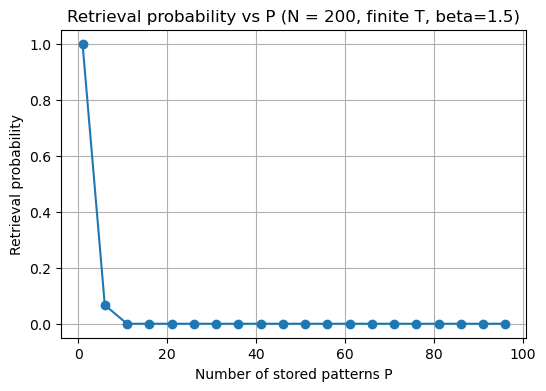

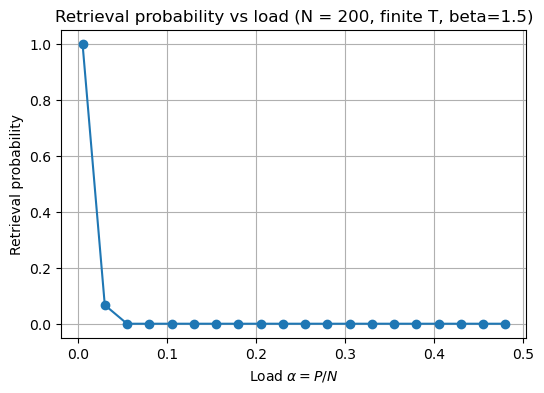

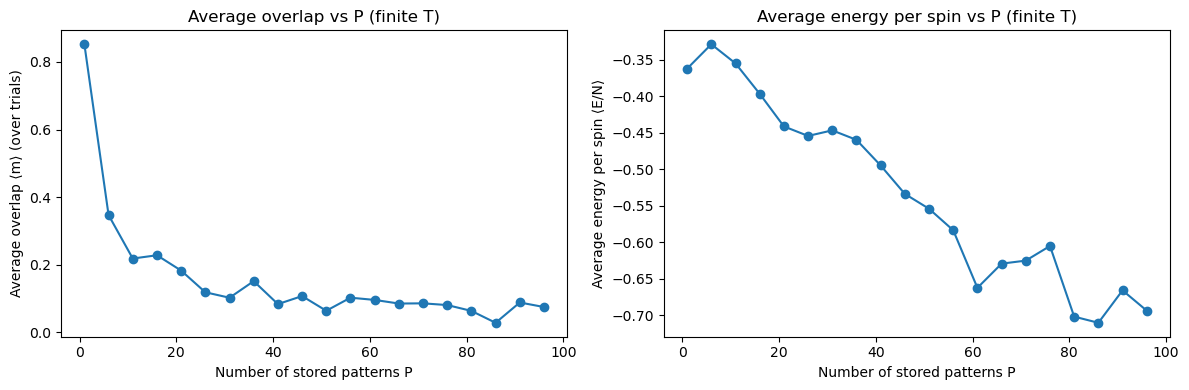

In [20]:
N = 200
beta = 1.5              
noise_level = 0.2
n_trials = 30
burn_in_sweeps = 50
measure_sweeps = 100
overlap_threshold = 0.8

# Range of P values (number of stored patterns)
P_values = np.arange(1, int(0.5 * N) + 1, 5)   # e.g. 1, 6, 11, ...
alpha_values = P_values / N

probabilities_T = []
mean_overlaps_per_P = []
mean_energies_per_P = []

for P in P_values:
    print(f"[finite T] N={N}, P={P}, alpha={P/N:.3f}...")
    prob_success, m_means, e_means = estimate_retrieval_probability_metropolis(
        N, P, beta, noise_level, n_trials, rng,
        burn_in_sweeps=burn_in_sweeps,
        measure_sweeps=measure_sweeps,
        overlap_threshold=overlap_threshold
    )
    probabilities_T.append(prob_success)
    mean_overlaps_per_P.append(np.mean(m_means))
    mean_energies_per_P.append(np.mean(e_means))

probabilities_T = np.array(probabilities_T)
mean_overlaps_per_P = np.array(mean_overlaps_per_P)
mean_energies_per_P = np.array(mean_energies_per_P)

# Plot retrieval probability vs P
plt.figure(figsize=(6,4))
plt.plot(P_values, probabilities_T, marker='o')
plt.xlabel('Number of stored patterns P')
plt.ylabel('Retrieval probability')
plt.title(f'Retrieval probability vs P (N = {N}, finite T, beta={beta})')
plt.ylim(-0.05, 1.05)
plt.grid(True)
plt.savefig("../figures/hopfield_metropolis_retrieval_probability_vs_P_N200_beta1p5.png",
            dpi=300, bbox_inches="tight")
plt.show()

# Optional: plot retrieval probability vs alpha
plt.figure(figsize=(6,4))
plt.plot(alpha_values, probabilities_T, marker='o')
plt.xlabel(r'Load $\alpha = P/N$')
plt.ylabel('Retrieval probability')
plt.title(f'Retrieval probability vs load (N = {N}, finite T, beta={beta})')
plt.ylim(-0.05, 1.05)
plt.grid(True)
plt.savefig("../figures/hopfield_metropolis_retrieval_probability_vs_load_N200_beta1p5.png",
            dpi=300, bbox_inches="tight")
plt.show()

# Optional: plot average overlap and energy per spin vs P
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(P_values, mean_overlaps_per_P, marker='o')
ax[0].set_xlabel('Number of stored patterns P')
ax[0].set_ylabel('Average overlap ⟨m⟩ (over trials)')
ax[0].set_title('Average overlap vs P (finite T)')

ax[1].plot(P_values, mean_energies_per_P, marker='o')
ax[1].set_xlabel('Number of stored patterns P')
ax[1].set_ylabel('Average energy per spin ⟨E/N⟩')
ax[1].set_title('Average energy per spin vs P (finite T)')

plt.tight_layout()
plt.savefig("../figures/hopfield_metropolis_equilibrium_observables_vs_P_N200_beta1p5.png",
            dpi=300, bbox_inches="tight")
plt.show()


##### 5.3.2. Retrieval probability vs $\alpha$ for fixed $N$ and different $T$

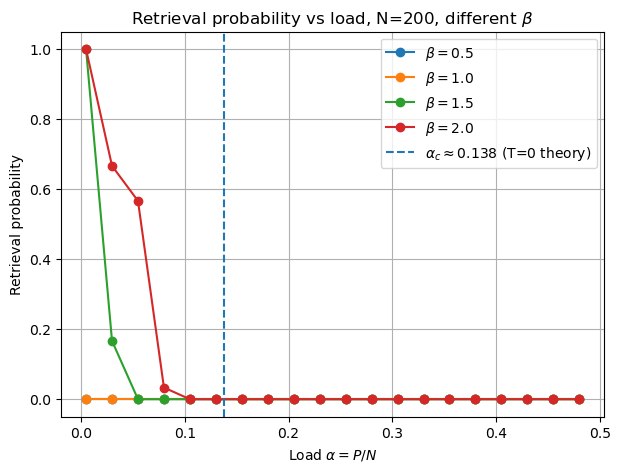

In [21]:
N = 200
noise_level = 0.2
n_trials = 30
burn_in_sweeps = 50
measure_sweeps = 100
overlap_threshold = 0.8

beta_list = [0.5, 1.0, 1.5, 2.0]  # from high T (weak retrieval) to low T (strong retrieval)

P_values = np.arange(1, int(0.5 * N) + 1, 5)
alpha_values = P_values / N

plt.figure(figsize=(7,5))

for beta in beta_list:
    probabilities_T = []

    for P in P_values:
        prob_success, m_means, e_means = estimate_retrieval_probability_metropolis(
            N, P, beta, noise_level, n_trials, rng,
            burn_in_sweeps=burn_in_sweeps,
            measure_sweeps=measure_sweeps,
            overlap_threshold=overlap_threshold
        )
        probabilities_T.append(prob_success)

    probabilities_T = np.array(probabilities_T)
    plt.plot(alpha_values, probabilities_T, marker='o', label=fr'$\beta = {beta}$')

plt.axvline(0.138, linestyle='--', label=r'$\alpha_c \approx 0.138$ (T=0 theory)')

plt.xlabel(r'Load $\alpha = P/N$')
plt.ylabel('Retrieval probability')
plt.title(fr'Retrieval probability vs load, N={N}, different $\beta$')
plt.ylim(-0.05, 1.05)
plt.grid(True)
plt.legend()
plt.savefig("../figures/hopfield_metropolis_retrieval_probability_vs_load_multiple_beta_N200.png",
            dpi=300, bbox_inches="tight")
plt.show()

At low temperature (large $\beta$) the curves resemble the $T=0$ capacity curve, with high retrieval probability up to a critical load. As the temperature increases (smaller $ \beta$), the transition becomes smoother and shifts: retrieval deteriorates already at smaller $\alpha$ and for high temperature the network fails to retrieve even at small load.

### **6. Conclusions**

At $T = 0$ we showed, with explicit examples, that the deterministic asynchronous Hopfield dynamics decreases the energy and can successfully retrieve stored patterns from noisy initial conditions. By repeating retrieval experiments for different numbers of stored patterns $P$ (and thus different loads $\alpha = P/N$), we obtained empirical capacity curves: for small $\alpha$ the retrieval probability is close to one, while beyond a critical load it rapidly drops towards zero. The location and shape of this transition are consistent with the theoretical storage capacity $\alpha_c \approx 0.138$ of the Hopfield model in the large-$N$ limit, up to finite-size effects and the chosen noise level and retrieval threshold.

At finite temperature we reformulated the Hopfield model in terms of the Boltzmann distribution associated with the Hopfield energy and simulated this equilibrium measure using the Metropolis algorithm. By tracking the overlap with a stored pattern and the energy per spin along the Metropolis trajectory, we observed how thermal fluctuations progressively degrade retrieval: the equilibrium overlap remains high at low temperature, but it decreases as $T$ increases, and for sufficiently high temperature the dynamics effectively “forgets” the patterns. Monte Carlo estimates of the retrieval probability as a function of $\alpha$ show that finite temperature smooths and shifts the transition: for the same load, retrieval is less reliable than at $T = 0$, and the range of loads with high retrieval probability shrinks.

Overall, the simulations confirm the qualitative theoretical picture: the Hopfield model behaves as an associative memory for loads below a capacity threshold, with performance deteriorating as the number of stored patterns increases and as temperature is raised. The Metropolis algorithm provides a natural stochastic simulation tool to explore this finite-temperature behaviour and to estimate retrieval-related quantities in a high-dimensional configuration space where exact calculations are infeasible.

#### **6.1. Possible extensions**
Several natural extensions could be explored to deepen this analysis:

- **Asymmetric or noisy couplings.** In the basic Hopfield model the coupling matrix is symmetric and exactly given by the Hebbian rule. One possible extension is to introduce asymmetry or random perturbations in the synaptic matrix and study how robust the retrieval properties and the energy landscape are under such perturbations. This would move the model closer to more realistic neural networks, where learning may not produce perfectly symmetric weights.

- **Improved Monte Carlo schemes (tempering).** The plain Metropolis algorithm can suffer from slow mixing and trapping in local minima, especially at low temperature and near the capacity limit where many metastable states are present. Techniques such as tempering methods (simulated or parallel tempering) could be used to explore the configuration space more efficiently. These algorithms would allow a more thorough sampling of the equilibrium measure, and could be compared with Metropolis in terms of convergence speed and ability to escape spurious attractors.

- **Multiple overlaps and interference between patterns.** Finally, one could monitor simultaneously the overlaps $m^\mu(\mathbf{s})$ with several stored patterns to study how the network distributes its “memory” among them when the load is high, and how interference between patterns manifests in the dynamics.

